<a href="https://colab.research.google.com/github/Srinathshadow/Comparative-Analysis-of-Machine-Learning-Models-for-Air-Pollution-Prediction/blob/main/Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
df = pd.read_csv('/content/sample_data/AirQuality[1].csv', sep=';', decimal=',')

In [16]:
# Remove last empty column
df = df.iloc[:, :-1]

# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Convert Date + Time into datetime
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H.%M.%S',
    errors='coerce'
)

# Drop Date & Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Drop rows with missing datetime
df.dropna(subset=['Datetime'], inplace=True)

# Fill missing values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)


In [17]:
X = df.drop(['CO(GT)', 'Datetime'], axis=1)
y = df['CO(GT)']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))

MAE: 0.31
RMSE: 0.48
R² Score: 0.88


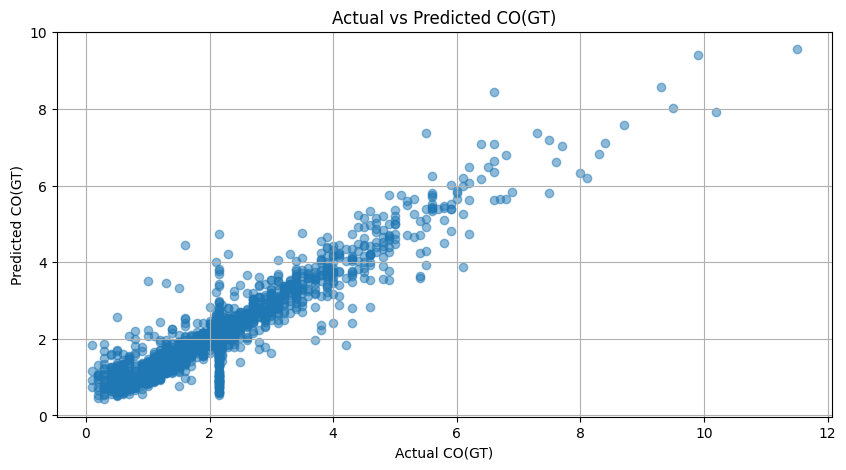

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Actual vs Predicted CO(GT)")
plt.grid(True)
plt.show()